## Lead scoring Case Study 

### Import and Read data

In [1]:
# Suppressing Warnings
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_data.shape

(9240, 37)

### Drop some columns which are obviously not needed so that we dont perform unnecessary operations on them

In [4]:
# Prospect ID and Lead Number columns are not of any value to the analysis. Hence dropping them.
lead_data = lead_data.drop(['Prospect ID', 'Lead Number'],1)

In [5]:
# Replacing occurances of the value 'Select' in the data set with Null
lead_data= lead_data.replace('Select', np.nan)

In [6]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Find the percentage of null values column-wise in descending order
(lead_data.isnull().sum()*100/len(lead_data)).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [8]:
# Dropping coulmns which have more than 35% null values
lead_data = lead_data.drop(['City', 'Specialization', 'Lead Profile', 'How did you hear about X Education', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'Lead Quality', 'Tags'], 1)

In [9]:
# Find the percentage of null values column-wise in descending order
(lead_data.isnull().sum()*100/len(lead_data)).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Last Notable Activity                             0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [10]:
# The columns 'What matters most to you in choosing a course' and 'What is your current occupation' have 
# close to 30% missing values. Let's at least drop the rows in which they are missing together
lead_data = lead_data[~((lead_data['What matters most to you in choosing a course'].isnull() == True) & (lead_data['What is your current occupation'].isnull() == True))]

In [11]:
# Find the percentage of null values column-wise in descending order
(lead_data.isnull().sum()*100/len(lead_data)).sort_values(ascending=False)

Country                                          24.503817
TotalVisits                                       1.984733
Page Views Per Visit                              1.984733
Last Activity                                     1.572519
Lead Source                                       0.549618
What matters most to you in choosing a course     0.290076
Last Notable Activity                             0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
What is your current occupation                   0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [12]:
# There are few columns with lesser number of empty values. We can drop those rows.
# Dropping rows with null values from certain columns
lead_data = lead_data[~(lead_data['TotalVisits'].isnull() | lead_data['Page Views Per Visit'].isnull() | lead_data['Last Activity'].isnull() | lead_data['Lead Source'].isnull() | lead_data['What matters most to you in choosing a course'].isnull())]

In [13]:
(lead_data.isnull().sum()*100/len(lead_data)).sort_values(ascending=False)

Country                                          22.708726
Last Notable Activity                             0.000000
What matters most to you in choosing a course     0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
What is your current occupation                   0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [14]:
# There are still null values in the column 'Country'. Let us impute it with the most frequently occuring calue for this field.
lead_data['Country'].value_counts()

India                   4724
United States             46
United Arab Emirates      39
Singapore                 18
Saudi Arabia              16
United Kingdom            11
Qatar                      9
Australia                  8
Hong Kong                  6
Oman                       5
France                     5
Bahrain                    5
Kuwait                     3
Nigeria                    3
South Africa               3
Sweden                     2
Canada                     2
Netherlands                2
Uganda                     2
Philippines                2
Germany                    2
Malaysia                   1
Italy                      1
Indonesia                  1
Tanzania                   1
Russia                     1
Bangladesh                 1
Vietnam                    1
Ghana                      1
China                      1
Denmark                    1
Kenya                      1
Sri Lanka                  1
Name: Country, dtype: int64

In [15]:
# India is the most frequently occuring Country. So imputing India for every null value in the column 'Country'
lead_data['Country'].fillna('India', inplace=True)
(lead_data.isnull().sum()*100/len(lead_data)).sort_values(ascending=False)

Last Notable Activity                            0.0
What matters most to you in choosing a course    0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

We can see from the above output there are no more null values

# Let us perform some Exploratory Data Analysis

In [16]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    6372 non-null   object 
 1   Lead Source                                    6372 non-null   object 
 2   Do Not Email                                   6372 non-null   object 
 3   Do Not Call                                    6372 non-null   object 
 4   Converted                                      6372 non-null   int64  
 5   TotalVisits                                    6372 non-null   float64
 6   Total Time Spent on Website                    6372 non-null   int64  
 7   Page Views Per Visit                           6372 non-null   float64
 8   Last Activity                                  6372 non-null   object 
 9   Country                                        6372 

### Inspecting numerical values, except the target variable Converted

In [17]:
# Checking for outliers for the continuous variables
lead_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6372.000000,6372.000000,6372.000000
mean,3.606717,535.279190,2.479565
std,4.852274,565.402288,2.166345
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,287.000000,2.000000
75%,5.000000,1022.250000,3.500000
90%,8.000000,1428.900000,5.000000
95%,10.000000,1592.450000,6.000000
99%,17.290000,1849.290000,9.000000


In [18]:
import seaborn as sns

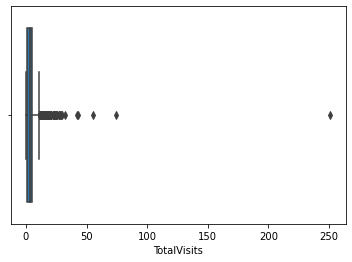

In [19]:
sns.boxplot(lead_data['TotalVisits'])

Observation: There seem to be outliers in the column 'TotalVisits'.

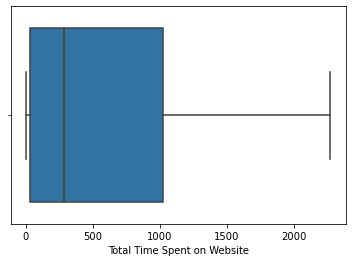

In [20]:
sns.boxplot(lead_data['Total Time Spent on Website'])


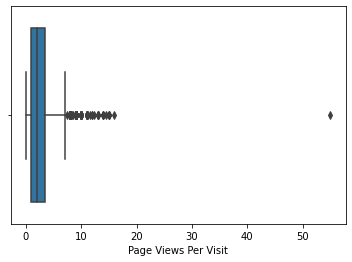

In [21]:
sns.boxplot(lead_data['Page Views Per Visit'])

Observation: There seem to be outliers in the column 'Page Views Per Visit'.

### Detecting and handling outliers

In [22]:
# Checking for values which are above the 99% mark for TotalVisits
lead_data[lead_data['TotalVisits'] > 18]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
345,Landing Page Submission,Organic Search,No,No,1,21.0,1113,2.63,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
469,Landing Page Submission,Organic Search,No,No,0,22.0,59,5.50,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
663,Landing Page Submission,Google,No,No,1,21.0,1885,3.50,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
1115,API,Direct Traffic,Yes,No,0,20.0,808,2.86,Email Bounced,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Bounced
1160,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
1741,Landing Page Submission,Direct Traffic,Yes,No,0,22.0,601,1.38,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
1824,Landing Page Submission,Direct Traffic,No,No,0,30.0,68,10.00,SMS Sent,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Modified
2154,API,Olark Chat,No,No,1,23.0,1677,2.09,Olark Chat Conversation,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Olark Chat Conversation
2190,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Modified
2289,Landing Page Submission,Google,No,No,1,21.0,1198,5.25,View in browser link Clicked,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Modified


Observation: On closer inspection we see only one entry has 'TotalVisits' as 251. This is an anomaly and hence can be removed so that the analysis is not skewed.

In [23]:
# Removing the outlier for TotalVisits as mentioned above
lead_data = lead_data[~(lead_data['TotalVisits'] == 251)]

In [24]:
# Checking for values which are above the 99% mark for Page Views Per Visit
lead_data[lead_data['Page Views Per Visit'] > 10]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
12,API,Organic Search,No,No,1,11.0,1538,11.00,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
56,Landing Page Submission,Referral Sites,No,No,1,13.0,436,13.00,Form Submitted on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
246,API,Referral Sites,No,No,0,14.0,354,14.00,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
264,API,Referral Sites,No,No,1,11.0,825,11.00,Olark Chat Conversation,India,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
303,Landing Page Submission,Google,No,No,0,11.0,1189,11.00,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
387,Landing Page Submission,Google,No,No,0,15.0,753,15.00,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Modified
429,API,Organic Search,No,No,0,11.0,220,11.00,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Modified
579,API,Organic Search,No,No,0,13.0,99,13.00,Olark Chat Conversation,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
967,API,Organic Search,No,No,1,11.0,1700,11.00,Email Opened,India,Businessman,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
1345,Landing Page Submission,Organic Search,No,No,1,11.0,608,11.00,SMS Sent,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,SMS Sent


Observation: On closer inspection we see only one entry has 'Page Views Per Visit' the high value 55. This is an anomaly and hence can be removed so that the analysis is not skewed.

In [25]:
# Removing the outlier for Page Views Per Visit as mentioned above
lead_data = lead_data[~(lead_data['Page Views Per Visit'] == 55)]

### Check for Data Imbalance

In [26]:
# Check for Data Imbalance
lead_data['Converted'].value_counts(normalize=True)

0    0.518995
1    0.481005
Name: Converted, dtype: float64

Observation: There is almost an even split between the data for converted and Non-converted. Data seems to be well balanced. So we do not need any measures to balance the data.

### Some column name transformations & further analysis

In [27]:
# Rename some columns so that they are concise
# 'What is your current occupation' -> 'Current_Occupation'
# 'What matters most to you in choosing a course' -> 'Course_Intent'
lead_data.rename(columns={'What is your current occupation':'Current_Occupation', 'What matters most to you in choosing a course': 'Course_Intent'}, inplace=True)

In [28]:
# Do Not Email -> Dont_email
# Do not Call -> Dont_call
# Newspaper Article -> Newspaper_Article
# X Education Forums -> XEducation_Forums
# Digital Advertisement -> Digital_Ad
# Through Recommendations -> Through_Recomm
lead_data.rename(columns={'Do Not Email':'Dont_email', 'Do Not Call': 'Dont_call', 'Newspaper Article': 'Newspaper_Article', 'X Education Forums' : 'XEducation_Forums', 'Digital Advertisement' : 'Digital_Ad', 'Through Recommendations' : 'Through_Recomm'}, inplace=True)
lead_data.head()

,Lead Origin,Lead Source,Dont_email,Dont_call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Current_Occupation,Course_Intent,Search,Magazine,Newspaper_Article,XEducation_Forums,Newspaper,Digital_Ad,Through_Recomm,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [29]:
# Receive More Updates About Our Courses -> Receive_CourseUpdates
# Update me on Supply Chain Content -> Update_SupplyChainContent
# Get updates on DM Content -> updates_DMContent
# I agree to pay the amount through cheque -> pay_thruCheque
# A free copy of Mastering The Interview -> freeCopy_MasteringInterview
# Last Notable Activity -> Last_NotableActivity
lead_data.rename(columns={'Receive More Updates About Our Courses' : 'Receive_CourseUpdates', 'Update me on Supply Chain Content' : 'Update_SupplyChainContent', 'Get updates on DM Content' : 'updates_DMContent', 'I agree to pay the amount through cheque' : 'pay_thruCheque', 'A free copy of Mastering The Interview' : 'freeCopy_MasteringInterview', 'Last Notable Activity' : 'Last_NotableActivity'}, inplace=True)


In [30]:
lead_data.head()

,Lead Origin,Lead Source,Dont_email,Dont_call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Current_Occupation,Course_Intent,Search,Magazine,Newspaper_Article,XEducation_Forums,Newspaper,Digital_Ad,Through_Recomm,Receive_CourseUpdates,Update_SupplyChainContent,updates_DMContent,pay_thruCheque,freeCopy_MasteringInterview,Last_NotableActivity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


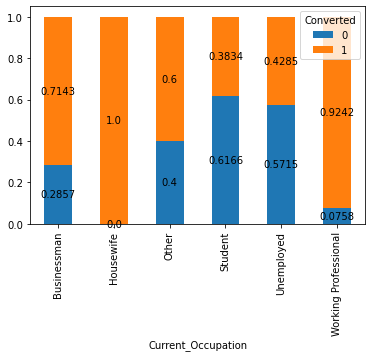

In [31]:
# Lets us try to check what percentage of leads with different categories of occupation get converted
df1 = pd.crosstab(lead_data['Current_Occupation'], lead_data['Converted'], normalize="index")
axis = df1.plot.bar(stacked=True)
for p in axis.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    height = round(height, 4)
    axis.text(x+width/2, \
            y+height/2, \
            f'{height}', \
            horizontalalignment='center', \
            verticalalignment='center')\
    

Observation: The highest conversiona rate is among Housewife. 100% of the leads from Housewife got converted. There is a good success rate among Working professional and businessman categories as well.

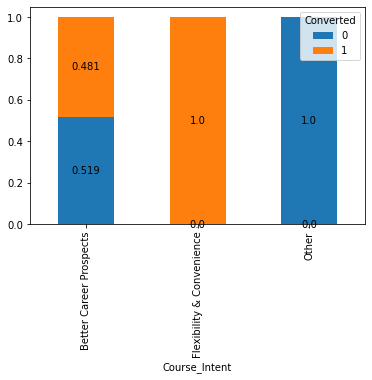

In [32]:
# Let us do a similar analysis with the field Course_Intent
df2 = pd.crosstab(lead_data['Course_Intent'], lead_data['Converted'], normalize="index")
axis = df2.plot.bar(stacked=True)
for p in axis.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    height = round(height, 4)
    axis.text(x+width/2, \
            y+height/2, \
            f'{height}', \
            horizontalalignment='center', \
            verticalalignment='center')\
    

Observation: All leads with the intent to join the course as 'Flexibility & Convenience' end up getting converted. On the other hand, the leads with 'Other' as value for 'Course_Intent' do not convert at all.

In [33]:
# Let us do a similar analysis with the field Course_Intent
df3 = pd.crosstab(lead_data['Country'], lead_data['Converted'], normalize="index")
df3

Converted,0,1
Country,,
Australia,0.750000,0.250000
Bahrain,0.200000,0.800000
Bangladesh,0.000000,1.000000
Canada,1.000000,0.000000
China,1.000000,0.000000
Denmark,0.000000,1.000000
France,0.400000,0.600000
Germany,0.500000,0.500000
Ghana,1.000000,0.000000


Observation: Based on the above table, certain countries stand out:
For lead conversions: 100% of leads from Bangladesh and Denmark get converted. More work could be done on Bahrain (80%), France (60%) and Hong Kong(66.67%) to get more conversions
For non conversions: None of the leads from Canada, China, Ghana, Italy, Kenya, Kuwait, Malaysia, Nigeria, Philippines, Russia, 
South Africa, Sri Lanka, Tanzania, Uganda and Vietnam get converted


In [34]:
# Converting all Yes to 1 and No to 0
columns = ['Dont_email', 'Dont_call', 'Search','Magazine', 'Newspaper_Article', 'XEducation_Forums', 'Newspaper', 'Digital_Ad','Through_Recomm', 'Receive_CourseUpdates', 'Update_SupplyChainContent', 'updates_DMContent', 'pay_thruCheque', 'freeCopy_MasteringInterview']
for col in columns:
    lead_data[col] = lead_data[col].map({'Yes': 1, 'No': 0})

In [35]:
# Label encoding for columns with large number of categorical values
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
lead_data[['Lead Source', 'Last Activity', 'Country', 'Last_NotableActivity']] = lead_data[['Lead Source', 'Last Activity', 'Country', 'Last_NotableActivity']].apply(label_enc.fit_transform)

In [36]:
# Use One-hot encoded dummy variables for the columns with small number of categorical values
# Creating a  for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Current_Occupation', 'Course_Intent']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)
lead_data.drop(['Lead Origin', 'Current_Occupation', 'Course_Intent'],1, inplace=True)

In [37]:
lead_data.head()

,Lead Source,Dont_email,Dont_call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Search,Magazine,Newspaper_Article,XEducation_Forums,Newspaper,Digital_Ad,Through_Recomm,Receive_CourseUpdates,Update_SupplyChainContent,updates_DMContent,pay_thruCheque,freeCopy_MasteringInterview,Last_NotableActivity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Course_Intent_Flexibility & Convenience,Course_Intent_Other
0,5,0,0,0,0.0,0,0.0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,1,0,0,0
1,6,0,0,0,5.0,674,2.5,5,10,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,2.0,1532,2.0,5,10,0,0,0,0,0,0,0,0,0,0,0,1,4,1,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1.0,305,1.0,12,10,0,0,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,1,0,0,0
4,3,0,0,1,2.0,1428,1.0,1,10,0,0,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,1,0,0,0


## Test-Train Split

In [38]:
# Let's split the data to independent and response variable
from sklearn.model_selection import train_test_split
# Putting response variable to y
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [39]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)
X.head()

,Lead Source,Dont_email,Dont_call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Search,Magazine,Newspaper_Article,XEducation_Forums,Newspaper,Digital_Ad,Through_Recomm,Receive_CourseUpdates,Update_SupplyChainContent,updates_DMContent,pay_thruCheque,freeCopy_MasteringInterview,Last_NotableActivity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Course_Intent_Flexibility & Convenience,Course_Intent_Other
0,5,0,0,0.0,0,0.0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,1,0,0,0
1,6,0,0,5.0,674,2.5,5,10,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0
2,1,0,0,2.0,1532,2.0,5,10,0,0,0,0,0,0,0,0,0,0,0,1,4,1,0,0,0,0,1,0,0,0,0
3,1,0,0,1.0,305,1.0,12,10,0,0,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,1,0,0,0
4,3,0,0,2.0,1428,1.0,1,10,0,0,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,1,0,0,0


In [40]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Lead Source,Dont_email,Dont_call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Search,Magazine,Newspaper_Article,XEducation_Forums,Newspaper,Digital_Ad,Through_Recomm,Receive_CourseUpdates,Update_SupplyChainContent,updates_DMContent,pay_thruCheque,freeCopy_MasteringInterview,Last_NotableActivity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Course_Intent_Flexibility & Convenience,Course_Intent_Other
218,1,0,0,0.125988,-0.611341,0.746425,3,10,0,0,0,0,0,0,0,0,0,0,0,1,7,1,0,0,0,0,0,1,0,0,0
4171,1,0,0,0.671938,-0.804070,1.716692,10,10,0,0,0,0,0,0,0,0,0,0,0,1,7,1,0,0,0,0,0,1,0,0,0
7136,1,0,0,0.125988,1.029512,-0.548881,10,10,0,0,0,0,0,0,0,0,0,0,0,1,9,1,0,0,0,0,0,0,1,0,0
7717,5,0,0,-0.965910,-0.941987,-1.194108,5,10,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0
207,6,0,0,0.398963,-0.308986,1.231559,10,29,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,1,0,0,0


## Looking at correlations

In [43]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

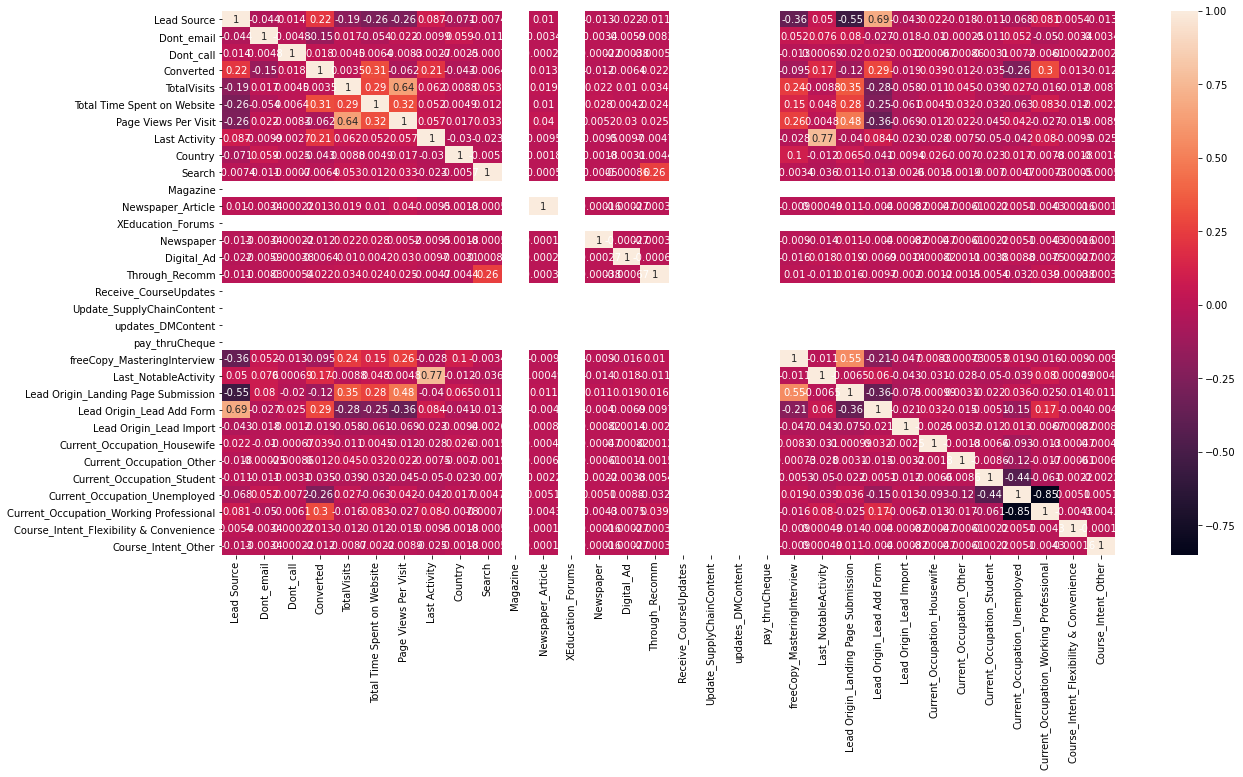

In [44]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

In [45]:
# Dropping highly correlated variables from both the training and test data sets
X_test = X_test.drop(['Page Views Per Visit','Lead Origin_Lead Add Form','Last_NotableActivity','Current_Occupation_Unemployed'], 1)
X_train = X_train.drop(['Page Views Per Visit','Lead Origin_Lead Add Form','Last_NotableActivity','Current_Occupation_Unemployed'], 1)

## Model Building

In [46]:
import statsmodels.api as sm

In [47]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4437
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2280.3
Date:                Tue, 28 Feb 2023   Deviance:                       4560.5
Time:                        00:06:19   Pearson chi2:                 4.44e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.5095      0.208     -7.251      0.000      -1.918      -1.101
Lead Source                                 0.2456      0.017     14.343      0.000       0.212       0.279
Dont_email                                 -1.3030      0.180     -7.221      0.000      -1.657      -0.949
Dont_call                                  22.9187   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                -0.1117      0.043     -2.610      0.009      -0.196      -0.028
Total Time Spent on Website                 1.0186      0.044     23.296      0.000       0.933       1.104
Last Activity                               0.1279      0.011     11.269      0.000       0.106       0.150
Country                                    -0.0353      0.015     -2.313      0.021      -0.065      -0.005
Search                                     -1.1749      1.492     -0.788      0.431      -4.098       1.749
Magazine                                 1.442e-10   7.23e-07      0.000      1.000   -1.42e-06    1.42e-06
Newspaper_Article                          22.9845   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
XEducation_Forums                        7.203e-11   1.98e-07      0.000      1.000   -3.87e-07    3.87e-07
Newspaper                                 -24.3427   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital_Ad                                -22.3435    5.6e+04     -0.000      1.000    -1.1e+05     1.1e+05
Through_Recomm                             21.8602   3.25e+04      0.001      0.999   -6.37e+04    6.38e+04
Receive_CourseUpdates                   -2.621e-15   2.05e-11     -0.000      1.000   -4.03e-11    4.03e-11
Update_SupplyChainContent                6.435e-15    9.5e-12      0.001      0.999   -1.86e-11    1.86e-11
updates_DMContent                       -3.605e-15   2.44e-11     -0.000      1.000   -4.78e-11    4.78e-11
pay_thruCheque                           5.338e-15   2.07e-11      0.000      1.000   -4.05e-11    4.06e-11
freeCopy_MasteringInterview                -0.0440      0.095     -0.462      0.644      -0.231       0.143
Lead Origin_Landing Page Submission        -0.3531      0.102     -3.456      0.001      -0.553      -0.153
Lead Origin_Lead Import                     0.4598      0.575      0.800      0.424      -0.667       1.587
Current_Occupation_Housewife               23.7826    2.8e+04      0.001      0.999   -5.48e+04    5.48e+04
Current_Occupation_Other                    0.9175      0.837      1.096      0.273      -0.724       2.559
Current_Occupation_Student                  0.1736      0.216      0.803      0.422      -0.250       0.597
Current_Occupation_Working Professional     2.6401      0.1

### Feature Selection Using RFE

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [49]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [50]:
rfe.support_

array([ True,  True,  True, False,  True, False, False,  True, False,
        True, False,  True,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True, False,  True,  True, False])

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Source', True, 1),
 ('Dont_email', True, 1),
 ('Dont_call', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Last Activity', False, 3),
 ('Country', False, 6),
 ('Search', True, 1),
 ('Magazine', False, 13),
 ('Newspaper_Article', True, 1),
 ('XEducation_Forums', False, 8),
 ('Newspaper', True, 1),
 ('Digital_Ad', True, 1),
 ('Through_Recomm', True, 1),
 ('Receive_CourseUpdates', False, 9),
 ('Update_SupplyChainContent', False, 10),
 ('updates_DMContent', False, 11),
 ('pay_thruCheque', False, 12),
 ('freeCopy_MasteringInterview', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Current_Occupation_Housewife', True, 1),
 ('Current_Occupation_Other', True, 1),
 ('Current_Occupation_Student', False, 2),
 ('Current_Occupation_Working Professional', True, 1),
 ('Course_Intent_Flexibility & Convenience', True, 1),
 ('Course_Intent_Other', False, 5)]

In [52]:
col = X_train.columns[rfe.support_]

In [53]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Last Activity', 'Country', 'Magazine',
       'XEducation_Forums', 'Receive_CourseUpdates',
       'Update_SupplyChainContent', 'updates_DMContent', 'pay_thruCheque',
       'freeCopy_MasteringInterview', 'Current_Occupation_Student',
       'Course_Intent_Other'],
      dtype='object')

#### Assessing the model with StatsModels

In [54]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2352.3
Date:                Tue, 28 Feb 2023   Deviance:                       4704.5
Time:                        00:06:21   Pearson chi2:                 4.55e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8972      0.101     -8.840      0.000      -1.096      -0.698
Lead Source                                 0.2535      0.017     15.162      0.000       0.221       0.286
Dont_email                                 -1.2313      0.174     -7.069      0.000      -1.573      -0.890
Dont_call                                  23.1269   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Total Time Spent on Website                 1.0034      0.042     23.822      0.000       0.921       1.086
Search                                     -1.7696      1.516     -1.167      0.243      -4.740       1.201
Newspaper_Article                          22.5505   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Newspaper                                 -24.7459   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital_Ad                                -21.9211   5.57e+04     -0.000      1.000   -1.09e+05    1.09e+05
Through_Recomm                             21.7784   3.36e+04      0.001      0.999   -6.59e+04    6.59e+04
Lead Origin_Landing Page Submission        -0.4461      0.087     -5.149      0.000      -0.616      -0.276
Lead Origin_Lead Import                     0.3756      0.571      0.658      0.511      -0.744       1.495
Current_Occupation_Housewife               23.3818   2.76e+04      0.001      0.999    -5.4e+04    5.41e+04
Current_Occupation_Other                    0.6679      0.808      0.827      0.409      -0.916       2.252
Current_Occupation_Working Professional     2.6647      0.187     14.267      0.000       2.299       3.031
Course_Intent_Flexibility & Convenience    24.1409   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
===========================================================================================================
"""

In [55]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

218     0.154044
4171    0.130492
7136    0.931366
7717    0.360112
207     0.577807
2044    0.395640
3332    0.632798
6499    0.861283
2085    0.810482
6261    0.120564
dtype: float64

In [56]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15404363, 0.13049183, 0.93136582, 0.36011159, 0.57780725,
       0.39563965, 0.63279848, 0.86128315, 0.81048206, 0.120564  ])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [57]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Convert_Prob
0,0,0.154044
1,1,0.130492
2,1,0.931366
3,1,0.360112
4,0,0.577807


#### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [58]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.154044,0
1,1,0.130492,0
2,1,0.931366,1
3,1,0.360112,0
4,0,0.577807,1


In [59]:
from sklearn import metrics

In [60]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1857  433]
 [ 646 1523]]


In [61]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7580174927113703


#### Checking VIFs

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source,1.39
9,Lead Origin_Landing Page Submission,1.37
3,Total Time Spent on Website,1.14
13,Current_Occupation_Working Professional,1.13
1,Dont_email,1.09
8,Through_Recomm,1.06
4,Search,1.05
2,Dont_call,1.00
5,Newspaper_Article,1.00
6,Newspaper,1.00


In [64]:
# VIFs seem to be ok. Let's remove Dont_call from the model since it's p-value is 1.
col = col.drop('Dont_call', 1)

In [65]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2352.8
Date:                Tue, 28 Feb 2023   Deviance:                       4705.5
Time:                        00:06:22   Pearson chi2:                 4.55e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8981      0.102     -8.848      0.000      -1.097      -0.699
Lead Source                                 0.2539      0.017     15.183      0.000       0.221       0.287
Dont_email                                 -1.2319      0.174     -7.072      0.000      -1.573      -0.891
Total Time Spent on Website                 1.0033      0.042     23.819      0.000       0.921       1.086
Search                                     -1.7703      1.516     -1.168      0.243      -4.741       1.200
Newspaper_Article                          22.5493   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Newspaper                                 -24.7452   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital_Ad                                -21.9206   5.57e+04     -0.000      1.000   -1.09e+05    1.09e+05
Through_Recomm                             21.7784   3.36e+04      0.001      0.999   -6.59e+04    6.59e+04
Lead Origin_Landing Page Submission        -0.4461      0.087     -5.149      0.000      -0.616      -0.276
Lead Origin_Lead Import                     0.3757      0.571      0.658      0.511      -0.743       1.495
Current_Occupation_Housewife               23.3807   2.76e+04      0.001      0.999    -5.4e+04     5.4e+04
Current_Occupation_Other                    0.6677      0.808      0.826      0.409      -0.916       2.252
Current_Occupation_Working Professional     2.6642      0.187     14.264      0.000       2.298       3.030
Course_Intent_Flexibility & Convenience    24.1399   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
===========================================================================================================
"""

In [66]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.15398375, 0.13044168, 0.93129863, 0.36035058, 0.57813548,
       0.39569825, 0.63282525, 0.8612881 , 0.81109052, 0.120518  ])

In [67]:
y_train_pred_final['Convert_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.153984,0
1,1,0.130442,0
2,1,0.931299,1
3,1,0.360351,0
4,0,0.578135,1


In [68]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7580174927113703


Accuracy of the revised model has not dropped

#### Let's check the VIFs again

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source,1.39
8,Lead Origin_Landing Page Submission,1.37
2,Total Time Spent on Website,1.14
12,Current_Occupation_Working Professional,1.13
1,Dont_email,1.09
7,Through_Recomm,1.06
3,Search,1.05
4,Newspaper_Article,1.00
5,Newspaper,1.00
6,Digital_Ad,1.00


VIFs values are acceptable.

In [70]:
# Let's remove Newspaper_Article from the model since it has a p-vale equal to 1 from the previous stats summary.
col = col.drop('Newspaper_Article')
col

Index(['Lead Source', 'Dont_email', 'Total Time Spent on Website', 'Search',
       'Newspaper', 'Digital_Ad', 'Through_Recomm',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Current_Occupation_Housewife', 'Current_Occupation_Other',
       'Current_Occupation_Working Professional',
       'Course_Intent_Flexibility & Convenience'],
      dtype='object')

In [71]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2353.1
Date:                Tue, 28 Feb 2023   Deviance:                       4706.1
Time:                        00:06:22   Pearson chi2:                 4.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8994      0.101     -8.861      0.000      -1.098      -0.700
Lead Source                                 0.2541      0.017     15.202      0.000       0.221       0.287
Dont_email                                 -1.2325      0.174     -7.075      0.000      -1.574      -0.891
Total Time Spent on Website                 1.0037      0.042     23.828      0.000       0.921       1.086
Search                                     -1.7703      1.516     -1.168      0.243      -4.741       1.200
Newspaper                                 -23.7462   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Digital_Ad                                -20.9205   3.38e+04     -0.001      1.000   -6.62e+04    6.62e+04
Through_Recomm                             20.7773   2.04e+04      0.001      0.999   -3.99e+04       4e+04
Lead Origin_Landing Page Submission        -0.4450      0.087     -5.137      0.000      -0.615      -0.275
Lead Origin_Lead Import                     0.3768      0.571      0.660      0.509      -0.742       1.496
Current_Occupation_Housewife               22.3799   1.67e+04      0.001      0.999   -3.27e+04    3.28e+04
Current_Occupation_Other                    0.6673      0.808      0.826      0.409      -0.917       2.251
Current_Occupation_Working Professional     2.6639      0.187     14.262      0.000       2.298       3.030
Course_Intent_Flexibility & Convenience    23.1402   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
===========================================================================================================
"""

In [72]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [73]:
y_train_pred[:10]

array([0.15396346, 0.1304151 , 0.93131175, 0.36028836, 0.5782003 ,
       0.39556499, 0.63308238, 0.86133077, 0.81138912, 0.12048927])

In [74]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [75]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.153963,0
1,1,0.130415,0
2,1,0.931312,1
3,1,0.360288,0
4,0,0.578200,1


In [76]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7582417582417582


Accuracy has improved marginally

#### Let's now check the VIFs again

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source,1.39
7,Lead Origin_Landing Page Submission,1.37
2,Total Time Spent on Website,1.14
11,Current_Occupation_Working Professional,1.13
1,Dont_email,1.09
6,Through_Recomm,1.06
3,Search,1.05
4,Newspaper,1.00
5,Digital_Ad,1.00
8,Lead Origin_Lead Import,1.00


All variables have good VIF. But from the prvious summary we see that p-value for Newspaper is 1. Removing it from the model.

In [78]:
col = col.drop('Newspaper')
col

Index(['Lead Source', 'Dont_email', 'Total Time Spent on Website', 'Search',
       'Digital_Ad', 'Through_Recomm', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Current_Occupation_Housewife',
       'Current_Occupation_Other', 'Current_Occupation_Working Professional',
       'Course_Intent_Flexibility & Convenience'],
      dtype='object')

In [79]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2354.5
Date:                Tue, 28 Feb 2023   Deviance:                       4709.0
Time:                        00:06:22   Pearson chi2:                 4.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9009      0.101     -8.879      0.000      -1.100      -0.702
Lead Source                                 0.2542      0.017     15.207      0.000       0.221       0.287
Dont_email                                 -1.2314      0.174     -7.070      0.000      -1.573      -0.890
Total Time Spent on Website                 1.0013      0.042     23.803      0.000       0.919       1.084
Search                                     -1.7701      1.516     -1.168      0.243      -4.741       1.201
Digital_Ad                                -20.9205   3.38e+04     -0.001      1.000   -6.62e+04    6.62e+04
Through_Recomm                             20.7822   2.04e+04      0.001      0.999   -3.99e+04       4e+04
Lead Origin_Landing Page Submission        -0.4448      0.087     -5.137      0.000      -0.615      -0.275
Lead Origin_Lead Import                     0.3759      0.571      0.658      0.510      -0.743       1.495
Current_Occupation_Housewife               22.3803   1.67e+04      0.001      0.999   -3.27e+04    3.28e+04
Current_Occupation_Other                    0.6690      0.808      0.828      0.408      -0.915       2.253
Current_Occupation_Working Professional     2.6646      0.187     14.267      0.000       2.299       3.031
Course_Intent_Flexibility & Convenience    23.1391   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
===========================================================================================================
"""

In [80]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [81]:
y_train_pred[:10]

array([0.15399083, 0.13049184, 0.93111259, 0.36054408, 0.57811534,
       0.39541518, 0.63219011, 0.86060629, 0.81164961, 0.12058411])

In [82]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [83]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.153991,0
1,1,0.130492,0
2,1,0.931113,1
3,1,0.360544,0
4,0,0.578115,1


In [84]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7580174927113703


Accuracy is more or less the same

#### Let's now check the VIFs again

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source,1.39
6,Lead Origin_Landing Page Submission,1.37
2,Total Time Spent on Website,1.14
10,Current_Occupation_Working Professional,1.13
1,Dont_email,1.09
5,Through_Recomm,1.06
3,Search,1.05
4,Digital_Ad,1.00
7,Lead Origin_Lead Import,1.00
8,Current_Occupation_Housewife,1.00


All variables have a good value of VIF. But from previous stats summary, we see Digital_Ad has p-value of 1. So this column has to be removed.

In [86]:
# Let's drop Digital_Ad since it has a high p-value
col = col.drop('Digital_Ad')
col

Index(['Lead Source', 'Dont_email', 'Total Time Spent on Website', 'Search',
       'Through_Recomm', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Current_Occupation_Housewife',
       'Current_Occupation_Other', 'Current_Occupation_Working Professional',
       'Course_Intent_Flexibility & Convenience'],
      dtype='object')

In [87]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2354.9
Date:                Tue, 28 Feb 2023   Deviance:                       4709.7
Time:                        00:06:23   Pearson chi2:                 4.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9017      0.101     -8.886      0.000      -1.101      -0.703
Lead Source                                 0.2544      0.017     15.218      0.000       0.222       0.287
Dont_email                                 -1.2310      0.174     -7.067      0.000      -1.572      -0.890
Total Time Spent on Website                 1.0019      0.042     23.817      0.000       0.919       1.084
Search                                     -1.7703      1.516     -1.168      0.243      -4.742       1.201
Through_Recomm                             20.7816   2.04e+04      0.001      0.999   -3.99e+04       4e+04
Lead Origin_Landing Page Submission        -0.4455      0.087     -5.144      0.000      -0.615      -0.276
Lead Origin_Lead Import                     0.3768      0.571      0.660      0.509      -0.742       1.496
Current_Occupation_Housewife               22.3806   1.67e+04      0.001      0.999   -3.27e+04    3.28e+04
Current_Occupation_Other                    0.6696      0.808      0.829      0.407      -0.914       2.254
Current_Occupation_Working Professional     2.6652      0.187     14.270      0.000       2.299       3.031
Course_Intent_Flexibility & Convenience    23.1395   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
===========================================================================================================
"""

In [88]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [89]:
y_train_pred[:10]

array([0.15377606, 0.13029233, 0.93110488, 0.3604555 , 0.57815691,
       0.39532039, 0.63212671, 0.86071221, 0.81182729, 0.1203922 ])

In [90]:
y_train_pred_final['Convert_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.153776,0
1,1,0.130292,0
2,1,0.931105,1
3,1,0.360456,0
4,0,0.578157,1


In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7580174927113703


Accuracy has not changed practically.

#### Let's now check the VIFs again

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source,1.39
5,Lead Origin_Landing Page Submission,1.37
2,Total Time Spent on Website,1.14
9,Current_Occupation_Working Professional,1.13
1,Dont_email,1.09
4,Through_Recomm,1.06
3,Search,1.05
6,Lead Origin_Lead Import,1.00
7,Current_Occupation_Housewife,1.00
8,Current_Occupation_Other,1.00


The VIF values for all features are good. But based on the previous stats summary, column Course_Intent_Flexibility & Convenience has probability 1. This column needs to be removed.

In [93]:
# Let's drop Course_Intent_Flexibility & Convenience since it has a high p-value
col = col.drop('Course_Intent_Flexibility & Convenience')
col

Index(['Lead Source', 'Dont_email', 'Total Time Spent on Website', 'Search',
       'Through_Recomm', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Current_Occupation_Housewife',
       'Current_Occupation_Other', 'Current_Occupation_Working Professional'],
      dtype='object')

In [94]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2355.9
Date:                Tue, 28 Feb 2023   Deviance:                       4711.8
Time:                        00:06:23   Pearson chi2:                 4.56e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8995      0.101     -8.867      0.000      -1.098      -0.701
Lead Source                                 0.2543      0.017     15.212      0.000       0.222       0.287
Dont_email                                 -1.2316      0.174     -7.071      0.000      -1.573      -0.890
Total Time Spent on Website                 1.0013      0.042     23.807      0.000       0.919       1.084
Search                                     -1.7714      1.516     -1.169      0.243      -4.743       1.200
Through_Recomm                             20.7826   2.04e+04      0.001      0.999   -3.99e+04       4e+04
Lead Origin_Landing Page Submission        -0.4471      0.087     -5.164      0.000      -0.617      -0.277
Lead Origin_Lead Import                     0.3744      0.571      0.656      0.512      -0.745       1.493
Current_Occupation_Housewife               22.3799   1.67e+04      0.001      0.999   -3.27e+04    3.28e+04
Current_Occupation_Other                    0.6690      0.808      0.828      0.408      -0.915       2.253
Current_Occupation_Working Professional     2.6643      0.187     14.266      0.000       2.298       3.030
===========================================================================================================
"""

In [95]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.15388176, 0.13039759, 0.93104104, 0.36095338, 0.57856156,
       0.39579761, 0.6320172 , 0.86078889, 0.81201427, 0.12049636])

In [96]:
y_train_pred_final['Convert_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.153882,0
1,1,0.130398,0
2,1,0.931041,1
3,1,0.360953,0
4,0,0.578562,1


In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7575689616505943


Accuracy has decreased maringally. But it is fine.

#### Let's now check the VIFs again

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source,1.39
5,Lead Origin_Landing Page Submission,1.37
2,Total Time Spent on Website,1.14
9,Current_Occupation_Working Professional,1.13
1,Dont_email,1.09
4,Through_Recomm,1.06
3,Search,1.05
6,Lead Origin_Lead Import,1.00
7,Current_Occupation_Housewife,1.00
8,Current_Occupation_Other,1.00


All variables have good VIF. But we need to drop column Through_Recomm since it has p-value 0.999.

In [99]:
# Let's drop Through_Recomm since it has a high p-value
col = col.drop('Through_Recomm')
col

Index(['Lead Source', 'Dont_email', 'Total Time Spent on Website', 'Search',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Current_Occupation_Housewife', 'Current_Occupation_Other',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [100]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2356.6
Date:                Tue, 28 Feb 2023   Deviance:                       4713.3
Time:                        00:06:23   Pearson chi2:                 4.56e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8995      0.101     -8.865      0.000      -1.098      -0.701
Lead Source                                 0.2544      0.017     15.219      0.000       0.222       0.287
Dont_email                                 -1.2323      0.174     -7.074      0.000      -1.574      -0.891
Total Time Spent on Website                 1.0029      0.042     23.857      0.000       0.920       1.085
Search                                     -1.3408      1.273     -1.053      0.292      -3.837       1.155
Lead Origin_Landing Page Submission        -0.4471      0.087     -5.163      0.000      -0.617      -0.277
Lead Origin_Lead Import                     0.3755      0.571      0.658      0.511      -0.744       1.495
Current_Occupation_Housewife               22.3795   1.67e+04      0.001      0.999   -3.27e+04    3.28e+04
Current_Occupation_Other                    0.6682      0.808      0.827      0.408      -0.916       2.252
Current_Occupation_Working Professional     2.6654      0.187     14.291      0.000       2.300       3.031
===========================================================================================================
"""

In [101]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.15377806, 0.13027216, 0.93123032, 0.36077497, 0.57865659,
       0.39579535, 0.63254807, 0.86121922, 0.81207372, 0.12036378])

In [102]:
y_train_pred_final['Convert_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.153778,0
1,1,0.130272,0
2,1,0.931230,1
3,1,0.360775,0
4,0,0.578657,1


In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.7575689616505943


Accuracy is a good value.

#### Let's now check the VIFs again


In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source,1.39
4,Lead Origin_Landing Page Submission,1.37
2,Total Time Spent on Website,1.13
8,Current_Occupation_Working Professional,1.13
1,Dont_email,1.09
3,Search,1.00
5,Lead Origin_Lead Import,1.00
6,Current_Occupation_Housewife,1.00
7,Current_Occupation_Other,1.00


All columns have good VIFs. But as per previous stats summary Current_Occupation_Housewife has a high p-value of 0.999.

In [105]:
# Let's drop Current_Occupation_Housewife since it has a high p-value
col = col.drop('Current_Occupation_Housewife')
col

Index(['Lead Source', 'Dont_email', 'Total Time Spent on Website', 'Search',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Current_Occupation_Other', 'Current_Occupation_Working Professional'],
      dtype='object')

In [106]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2361.1
Date:                Tue, 28 Feb 2023   Deviance:                       4722.1
Time:                        00:06:23   Pearson chi2:                 4.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9038      0.101     -8.907      0.000      -1.103      -0.705
Lead Source                                 0.2559      0.017     15.305      0.000       0.223       0.289
Dont_email                                 -1.2374      0.174     -7.103      0.000      -1.579      -0.896
Total Time Spent on Website                 1.0023      0.042     23.852      0.000       0.920       1.085
Search                                     -1.3428      1.273     -1.055      0.291      -3.838       1.152
Lead Origin_Landing Page Submission        -0.4417      0.087     -5.105      0.000      -0.611      -0.272
Lead Origin_Lead Import                     0.3765      0.571      0.659      0.510      -0.743       1.496
Current_Occupation_Other                    0.6646      0.808      0.822      0.411      -0.920       2.249
Current_Occupation_Working Professional     2.6613      0.187     14.268      0.000       2.296       3.027
===========================================================================================================
"""

In [107]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.15416695, 0.13062411, 0.93109175, 0.36158862, 0.57977354,
       0.39585345, 0.63366601, 0.86108499, 0.81436155, 0.12069851])

In [108]:
y_train_pred_final['Convert_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.154167,0
1,1,0.130624,0
2,1,0.931092,1
3,1,0.361589,0
4,0,0.579774,1


In [109]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7568961650594304


Accuracy is good.

#### Let's now check the VIFs again

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source,1.38
4,Lead Origin_Landing Page Submission,1.37
2,Total Time Spent on Website,1.13
7,Current_Occupation_Working Professional,1.13
1,Dont_email,1.09
3,Search,1.00
5,Lead Origin_Lead Import,1.00
6,Current_Occupation_Other,1.00


All columns have good VIFs. But based on previous stats summary, p-value of Lead Origin_Lead Import is high.

In [111]:
# Let's drop Lead Origin_Lead Import since it has a high p-value
col = col.drop('Lead Origin_Lead Import')
col

Index(['Lead Source', 'Dont_email', 'Total Time Spent on Website', 'Search',
       'Lead Origin_Landing Page Submission', 'Current_Occupation_Other',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [112]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4451
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2361.3
Date:                Tue, 28 Feb 2023   Deviance:                       4722.5
Time:                        00:06:24   Pearson chi2:                 4.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8957      0.101     -8.897      0.000      -1.093      -0.698
Lead Source                                 0.2548      0.017     15.327      0.000       0.222       0.287
Dont_email                                 -1.2379      0.174     -7.108      0.000      -1.579      -0.897
Total Time Spent on Website                 1.0007      0.042     23.863      0.000       0.919       1.083
Search                                     -1.3445      1.273     -1.056      0.291      -3.839       1.150
Lead Origin_Landing Page Submission        -0.4464      0.086     -5.179      0.000      -0.615      -0.277
Current_Occupation_Other                    0.6633      0.808      0.821      0.412      -0.921       2.247
Current_Occupation_Working Professional     2.6617      0.187     14.270      0.000       2.296       3.027
===========================================================================================================
"""

In [113]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.15458576, 0.13102313, 0.93115975, 0.36253959, 0.58027052,
       0.39711458, 0.63327654, 0.86129657, 0.81366626, 0.12108641])

In [114]:
y_train_pred_final['Convert_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.154586,0
1,1,0.131023,0
2,1,0.931160,1
3,1,0.362540,0
4,0,0.580271,1


In [115]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7566718995290423


Accuracy is good.

#### Let's now check the VIFs again

In [116]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source,1.38
4,Lead Origin_Landing Page Submission,1.37
2,Total Time Spent on Website,1.13
6,Current_Occupation_Working Professional,1.13
1,Dont_email,1.09
3,Search,1.00
5,Current_Occupation_Other,1.00


All columns have good VIF values. But from previous summary, Current_Occupation_Other has high p-value.

In [117]:
# Let's drop Current_Occupation_Other since it has a high p-value
col = col.drop('Current_Occupation_Other')
col


Index(['Lead Source', 'Dont_email', 'Total Time Spent on Website', 'Search',
       'Lead Origin_Landing Page Submission',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [118]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4452
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2361.6
Date:                Tue, 28 Feb 2023   Deviance:                       4723.2
Time:                        00:06:24   Pearson chi2:                 4.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8939      0.101     -8.884      0.000      -1.091      -0.697
Lead Source                                 0.2547      0.017     15.324      0.000       0.222       0.287
Dont_email                                 -1.2392      0.174     -7.116      0.000      -1.581      -0.898
Total Time Spent on Website                 1.0011      0.042     23.871      0.000       0.919       1.083
Search                                     -1.3457      1.273     -1.057      0.290      -3.840       1.149
Lead Origin_Landing Page Submission        -0.4464      0.086     -5.180      0.000      -0.615      -0.277
Current_Occupation_Working Professional     2.6604      0.187     14.264      0.000       2.295       3.026
===========================================================================================================
"""

In [119]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.15478301, 0.13118692, 0.93120912, 0.36277251, 0.58055196,
       0.39745388, 0.63373538, 0.8615639 , 0.8137168 , 0.12123599])

In [120]:
y_train_pred_final['Convert_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.154783,0
1,1,0.131187,0
2,1,0.931209,1
3,1,0.362773,0
4,0,0.580552,1


In [121]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7559991029378784


Accuracy is good.

#### Let's now check the VIFs again

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source,1.38
4,Lead Origin_Landing Page Submission,1.36
2,Total Time Spent on Website,1.13
5,Current_Occupation_Working Professional,1.13
1,Dont_email,1.09
3,Search,1.00


All clumns have good VIFs. But from previous stats summary, Search has a high p-value.

In [123]:
# Let's drop Search since it has a high p-value
col = col.drop('Search')
col

Index(['Lead Source', 'Dont_email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [124]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4459
Model:                            GLM   Df Residuals:                     4453
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2362.2
Date:                Tue, 28 Feb 2023   Deviance:                       4724.3
Time:                        00:06:24   Pearson chi2:                 4.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8957      0.101     -8.904      0.000      -1.093      -0.699
Lead Source                                 0.2547      0.017     15.329      0.000       0.222       0.287
Dont_email                                 -1.2383      0.174     -7.112      0.000      -1.580      -0.897
Total Time Spent on Website                 1.0005      0.042     23.861      0.000       0.918       1.083
Lead Origin_Landing Page Submission        -0.4448      0.086     -5.163      0.000      -0.614      -0.276
Current_Occupation_Working Professional     2.6562      0.186     14.251      0.000       2.291       3.022
===========================================================================================================
"""

In [125]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.15480658, 0.13122015, 0.93089415, 0.36247961, 0.5801524 ,
       0.39706341, 0.63354101, 0.86121456, 0.81351525, 0.12127259])

In [126]:
y_train_pred_final['Convert_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,0,0.154807,0
1,1,0.131220,0
2,1,0.930894,1
3,1,0.362480,0
4,0,0.580152,1


In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7559991029378784


Accuracy ofthe model is good.

#### Let's now check the VIFs again

In [128]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source,1.38
3,Lead Origin_Landing Page Submission,1.36
2,Total Time Spent on Website,1.13
4,Current_Occupation_Working Professional,1.13
1,Dont_email,1.09


VIFs for all columns is good. From the previous stats summary we can also see all columns have a p-value of zero. So the model is good.

## Metrics beyond simply accuracy

In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.702166897187644

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.8109170305676856

In [132]:
# Calculate false postive rate - predicting Convert when customer would not have converted
print(FP/ float(TN+FP))

0.18908296943231442


In [133]:
# positive predictive value 
print (TP / float(TP+FP))

0.7786298568507157


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.74190970834998


The model has good Sensitivity and Postivie predictive value. So the model can predict Convert rate prestty well.

## Plotting the ROC Curve

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

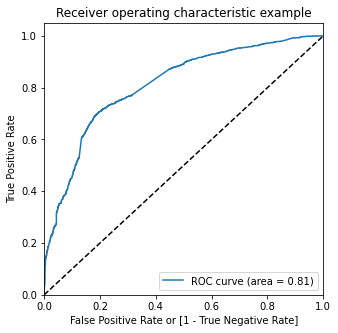

In [137]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

## Finding Optimal Cutoff Point

In [138]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.154807,0,1,1,0,0,0,0,0,0,0,0
1,1,0.131220,0,1,1,0,0,0,0,0,0,0,0
2,1,0.930894,1,1,1,1,1,1,1,1,1,1,1
3,1,0.362480,0,1,1,1,1,0,0,0,0,0,0
4,0,0.580152,1,1,1,1,1,1,1,0,0,0,0


In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.486432  1.000000  0.000000
0.1   0.1  0.511998  0.999078  0.050655
0.2   0.2  0.616057  0.953896  0.296070
0.3   0.3  0.688047  0.903642  0.483843
0.4   0.4  0.738058  0.755648  0.721397
0.5   0.5  0.755999  0.700323  0.808734
0.6   0.6  0.740525  0.614108  0.860262
0.7   0.7  0.679749  0.437068  0.909607
0.8   0.8  0.648576  0.327801  0.952402
0.9   0.9  0.594304  0.179806  0.986900


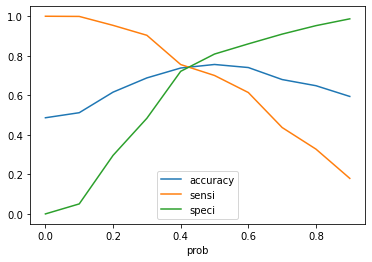

In [140]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.154807,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.131220,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.930894,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.362480,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.580152,1,1,1,1,1,1,1,0,0,0,0,1


In [142]:
# Let's check the overall accuracy with the optimum probability value.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7380578605068401

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1652,  638],
       [ 530, 1639]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model with the optimum probability value.
TP / float(TP+FN)

0.7556477639465191

The model has a good sensitivity. So it will predict conversions very well.

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.7213973799126637

In [147]:
# Calculate false postive rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.2786026200873362


In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7198067632850241


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7571035747021082


## Precision and Recall

In [150]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1852,  438],
       [ 650, 1519]], dtype=int64)

### Precision
TP / TP + FP

In [151]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.776188042922841

### Recall
TP / TP + FN

In [152]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7003227293683725

## Making predictions on the test set

In [153]:
X_test[['Total Time Spent on Website']] = scaler.fit_transform(X_test[['Total Time Spent on Website']])
# The other 2 scaled variables have been removed in the model

In [154]:
X_test = X_test[col]
X_test.head()

,Lead Source,Dont_email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Current_Occupation_Working Professional
8402,3,0,1.540603,0,0
8782,1,0,0.030867,0,0
6200,3,0,-0.431081,1,0
6483,5,0,-0.958515,0,0
6024,3,0,-0.620462,1,0


In [155]:
X_test_sm = sm.add_constant(X_test)

In [156]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [157]:
y_test_pred[:10]

8402    0.803732
8782    0.352036
6200    0.267444
6483    0.358667
6024    0.231990
6003    0.410357
3814    0.702775
6951    0.371666
5639    0.570301
4172    0.650155
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
8402,0.803732
8782,0.352036
6200,0.267444
6483,0.358667
6024,0.231990


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Converted,0
8402,1,0.803732
8782,0,0.352036
6200,1,0.267444
6483,0,0.358667
6024,0,0.231990


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})


In [163]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [164]:
y_pred_final['lead_score'] = y_pred_final.Converted_Prob*100


In [165]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted,lead_score
8402,1,0.803732,1,80.373211
8782,0,0.352036,0,35.203583
6200,1,0.267444,0,26.744350
6483,0,0.358667,0,35.866694
6024,0,0.231990,0,23.199042


### The lead score as needed in the assignment is available in the final column of the qbove data frame

In [166]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7226582940868655

In [167]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[702, 314],
       [216, 679]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.758659217877095

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.6909448818897638

## Conclusion: 
The model is as follows:
The features Current_Occupation_Working Professional, Dont_email, Total Time Spent on Website, Lead Origin_Landing Page Submission and Lead Source are the top drivers of this model.

The overall accuracy of predictions on training data set and test data set are 73.81 and 72.27.
Similarly, the sensitivity values for predictions on training data set and test data set are 75.56 and 75.87.
So the model is highly stable as well.